
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [39]:
import seaborn as sns

df = sns.load_dataset("mpg")
df["horsepower"].unique()
df.dropna(inplace=True)
df.drop(columns=["origin", "name"], inplace=True)

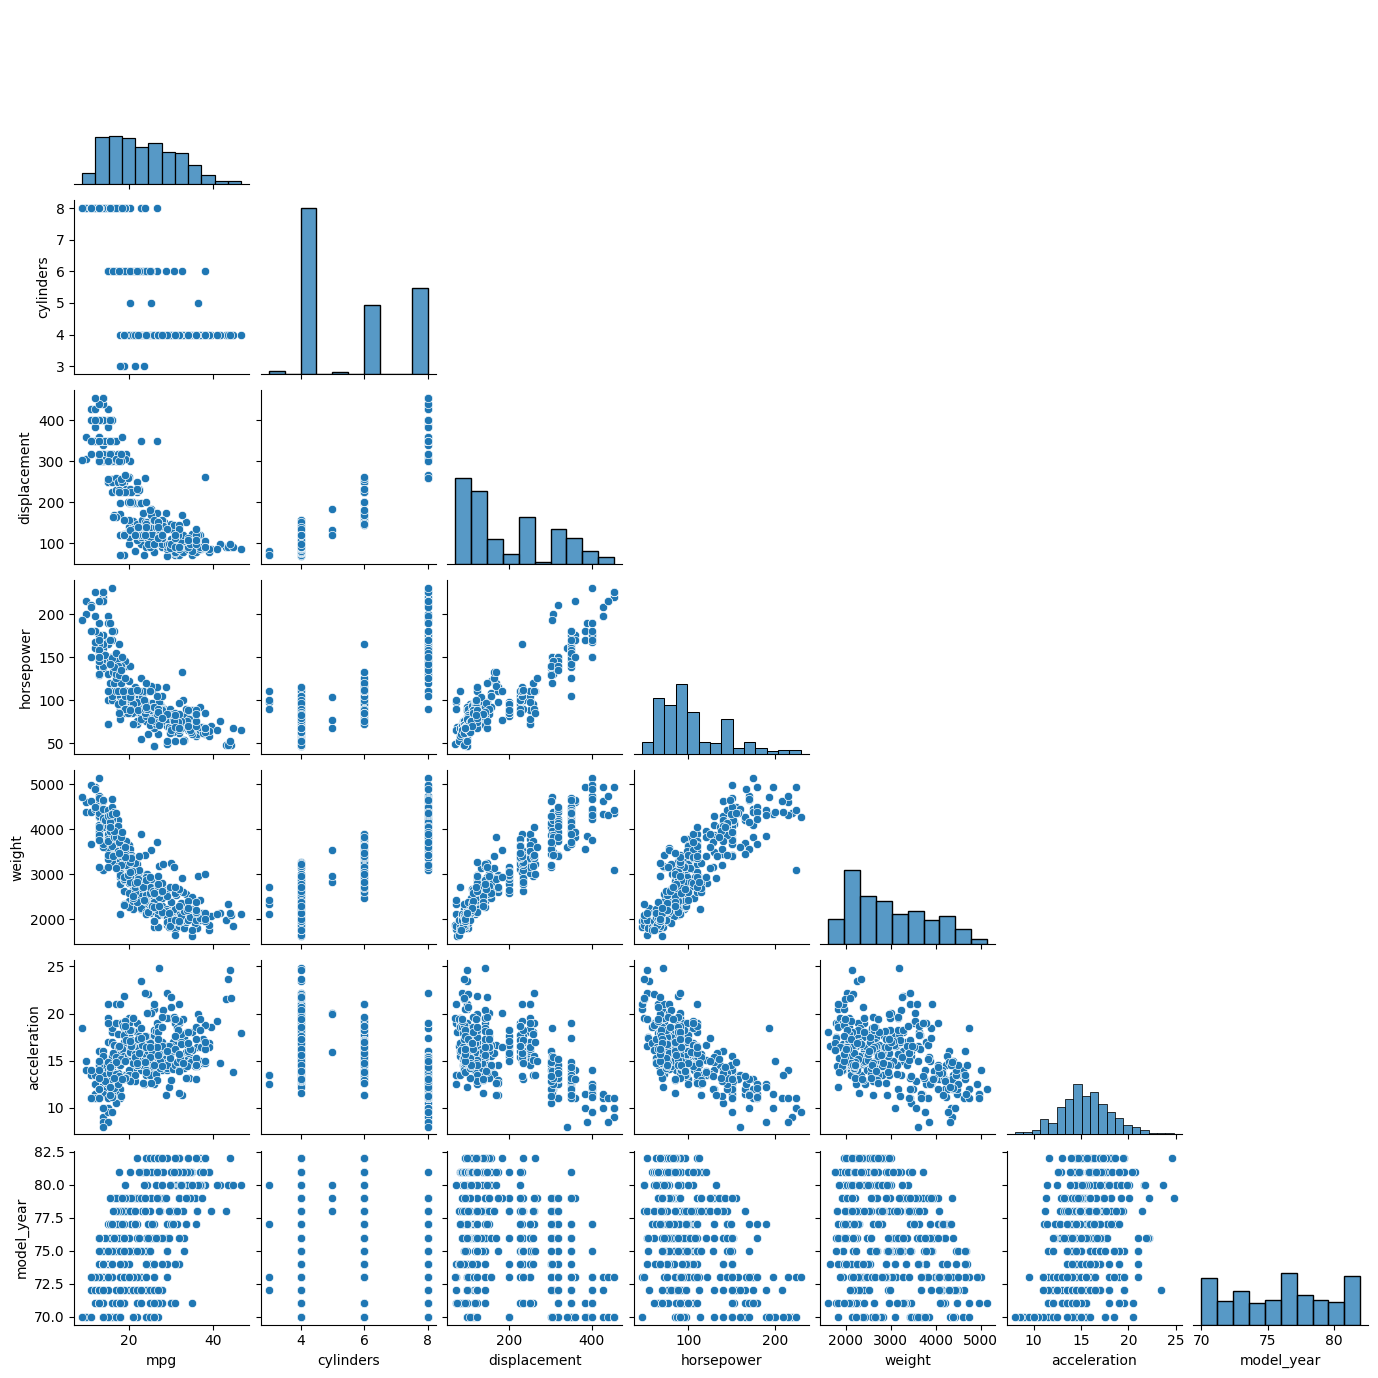

In [40]:
sns.pairplot(df, corner=True, height=2)

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["mpg"])
# X.insert(0, "Intercept", 1)
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(313, 6)

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [42]:
def evaluate(y, y_hat):

    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

    R2 = r2_score(y, y_hat)
    MAE = mean_absolute_error(y, y_hat)
    MSE = mean_squared_error(y, y_hat)
    RMSE = root_mean_squared_error(y, y_hat)

    return {
        "R2": R2,
        "MAE": MAE,
        "MSE": MSE,
        "RMSE": RMSE,
    }


def lr(X_train, y_train, X_test, y_test):
    
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_eval = evaluate(y_train, y_hat_train)
    test_eval = evaluate(y_test, y_hat_test)

    return (train_eval, test_eval)


linear = lr(X_train, y_train, X_test, y_test)

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [43]:
def standardise(X_train, X_test):
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler().fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    return X_train_std, X_test_std


def lr_std(X_train, y_train, X_test, y_test):
    
    from sklearn.linear_model import LinearRegression

    X_train, X_test = standardise(X_train, X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_eval = evaluate(y_train, y_hat_train)
    test_eval = evaluate(y_test, y_hat_test)

    return (train_eval, test_eval)


def plr(X_train, y_train, X_test, y_test, degree=1, std=False):

    import numpy as np
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression

    if std == True:
        X_train, X_test = standardise(X_train, X_test)
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_eval = evaluate(y_train, y_hat_train)
    test_eval = evaluate(y_test, y_hat_test)

    return (train_eval, test_eval)

In [45]:
# LINEAR
print("--- LINEAR ---")
print()
linear = lr(X_train, y_train, X_test, y_test)
print("Training metrics:")
for key, value in linear[0].items():
    print(f"{key}: {value}")
print()
print("Testing metrics:")
for key, value in linear[1].items():
    print(f"{key}: {value}")
print()

# STANDARDISED
print("--- STANDARDISED ---")
print()
linear_std = lr_std(X_train, y_train, X_test, y_test)
print("Training metrics:")
for key, value in linear_std[0].items():
    print(f"{key}: {value}")
print()
print("Testing metrics:")
for key, value in linear_std[1].items():
    print(f"{key}: {value}")
print()

# POLY ONE
print("--- POLY ONE ---")
print()
poly1 = plr(X_train, y_train, X_test, y_test)
print("Training metrics:")
for key, value in poly1[0].items():
    print(f"{key}: {value}")
print()
print("Testing metrics:")
for key, value in poly1[1].items():
    print(f"{key}: {value}")
print()

# POLY TWO
print("--- POLY TWO ---")
print()
poly2 = plr(X_train, y_train, X_test, y_test, 2)
print("Training metrics:")
for key, value in poly2[0].items():
    print(f"{key}: {value}")
print()
print("Testing metrics:")
for key, value in poly2[1].items():
    print(f"{key}: {value}")
print()

# POLY THREE
print("--- POLY THREE ---")
print()
poly3 = plr(X_train, y_train, X_test, y_test, 3)
print("Training metrics:")
for key, value in poly3[0].items():
    print(f"{key}: {value}")
print()
print("Testing metrics:")
for key, value in poly3[1].items():
    print(f"{key}: {value}")
print()

--- LINEAR ---

Training metrics:
R2: 0.8107227953093896
MAE: 2.669175930481722
MSE: 11.943343161136761
RMSE: 3.4559142294242142

Testing metrics:
R2: 0.7942349075428587
MAE: 2.503860089776127
MSE: 10.502370329417316
RMSE: 3.2407360783342596

--- STANDARDISED ---

Training metrics:
R2: 0.8107227953093896
MAE: 2.669175930481722
MSE: 11.943343161136763
RMSE: 3.4559142294242147

Testing metrics:
R2: 0.7942349075428592
MAE: 2.503860089776124
MSE: 10.502370329417298
RMSE: 3.240736078334257

--- POLY ONE ---

Training metrics:
R2: 0.8107227953093897
MAE: 2.6691759304817215
MSE: 11.94334316113676
RMSE: 3.4559142294242142

Testing metrics:
R2: 0.7942349075428589
MAE: 2.503860089776127
MSE: 10.502370329417314
RMSE: 3.240736078334259

--- POLY TWO ---

Training metrics:
R2: 0.8901932667618382
MAE: 1.899814312593829
MSE: 6.928776756876031
RMSE: 2.6322569701448284

Testing metrics:
R2: 0.854628264856736
MAE: 1.980477209691131
MSE: 7.4198581483034305
RMSE: 2.7239416565527668

--- POLY THREE ---

Tr


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---